In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import riskfolio as rp

pd.options.display.float_format = '{:.4%}'.format

# 1. yfinance에서 실제 주식 데이터를 가져옵니다.
tickers = [
    '449170.KS',  # 원화 
    '411060.KS',  # 금
    '456880.KS',  # 달러
]

# 2. 주식 데이터 다운로드 (2022년 1월 1일부터 2023년 1월 1일까지의 데이터를 예시로 사용)
data = yf.download(tickers, start='2000-01-01', end='2025-01-01')['Adj Close']

# 3. 주식 수익률 데이터 생성
returns = data.pct_change().dropna()

# 4. 자산 클래스 정의 (각 자산의 산업 섹터)
asset_classes = {
    'Assets': tickers,
    'Industry': ['Tech', 'Tech', 'Tech', 'Finance', 'Finance', 'Finance', 
                 'Energy', 'Energy', 'Industrials', 'Industrials', 'Industrials', 'Industrials']
}
asset_classes = pd.DataFrame(asset_classes)

# 5. 투자자의 뷰 정의
views = {
    'Disabled': [False, False],               # 뷰가 활성화 되어 있음
    'Type': ['Classes', 'Classes'],           # 뷰의 타입은 자산 클래스에 기반
    'Set': ['Industry', 'Industry'],          # 산업 섹터를 기준으로 뷰를 설정
    'Position': ['Tech', 'Energy'],           # Tech 섹터와 Energy 섹터에 대한 뷰를 정의
    'Sign': ['>=', '<='],                     # Tech 섹터는 상대적으로 더 높게, Energy 섹터는 더 낮게 예상
    'Weight': [0.02, -0.01],                  # Tech는 2% 이상, Energy는 1% 이하 수익률 차이를 예상
    'Type Relative': ['Classes', 'Classes'],  # 비교하는 상대도 자산 클래스
    'Relative Set': ['Industry', 'Industry'], # 비교 기준도 산업 섹터
    'Relative': ['Finance', 'Industrials']    # Tech는 Finance와, Energy는 Industrials와 비교
}
views = pd.DataFrame(views)

# 6. 투자자의 뷰를 기반으로 P와 Q 매트릭스 생성
P, Q = rp.assets_views(views, asset_classes)

# 7. 포트폴리오 객체 생성
port = rp.Portfolio(returns=returns)

# 8. 자산 기대 수익률과 공분산 행렬 추정
port.assets_stats(method_mu='hist', method_cov='hist')

# 9. 초기 자산 가중치를 설정 (균등 가중치)
initial_weights = np.array([1/len(tickers)] * len(tickers)).reshape(-1, 1)
display(initial_weights.T)

# 10. Black-Litterman 모델에 맞춘 통계값 계산
port.blacklitterman_stats(P, Q, rf=0.0, w=initial_weights, delta=None, eq=True)

# 11. 포트폴리오 최적화 계산 (샤프 비율 최대화)
# port.solvers = ['MOSEK']  # 최적화에 사용할 솔버 설정
w_bl = port.optimization(model='BL', rm='MV', obj='Sharpe', rf=0, l=0, hist=False)

# 12. 최적의 포트폴리오 가중치 출력
print("최적화된 포트폴리오 가중치:")
display(w_bl.T)


[*********************100%%**********************]  10 of 10 completed


ValueError: All arrays must be of the same length

,Assets,Class
0,449170.KS,KRW
1,411060.KS,GOLD
2,456880.KS,USD


[*********************100%%**********************]  3 of 3 completed


Ticker,411060.KS,449170.KS,456880.KS
Date,,,
2023-04-26,0.2039%,0.0049%,0.3976%
2023-04-27,0.4477%,0.0099%,0.0495%
2023-04-28,-1.0940%,0.0345%,0.2474%
2023-05-02,0.5735%,0.0148%,0.1974%
2023-05-03,1.1405%,0.0049%,-0.4433%
...,...,...,...
2024-09-09,-0.2593%,0.0094%,0.6032%
2024-09-10,0.4550%,0.0094%,0.3690%
2024-09-11,0.3882%,0.0047%,-0.0919%


각 자산의 연간 평균 수익률:


Ticker
411060.KS   19.6202%
449170.KS    3.9092%
456880.KS    5.9540%
dtype: float64

각 자산의 연간 분산:


Ticker
411060.KS   2.1062%
449170.KS   0.0003%
456880.KS   0.7210%
dtype: float64

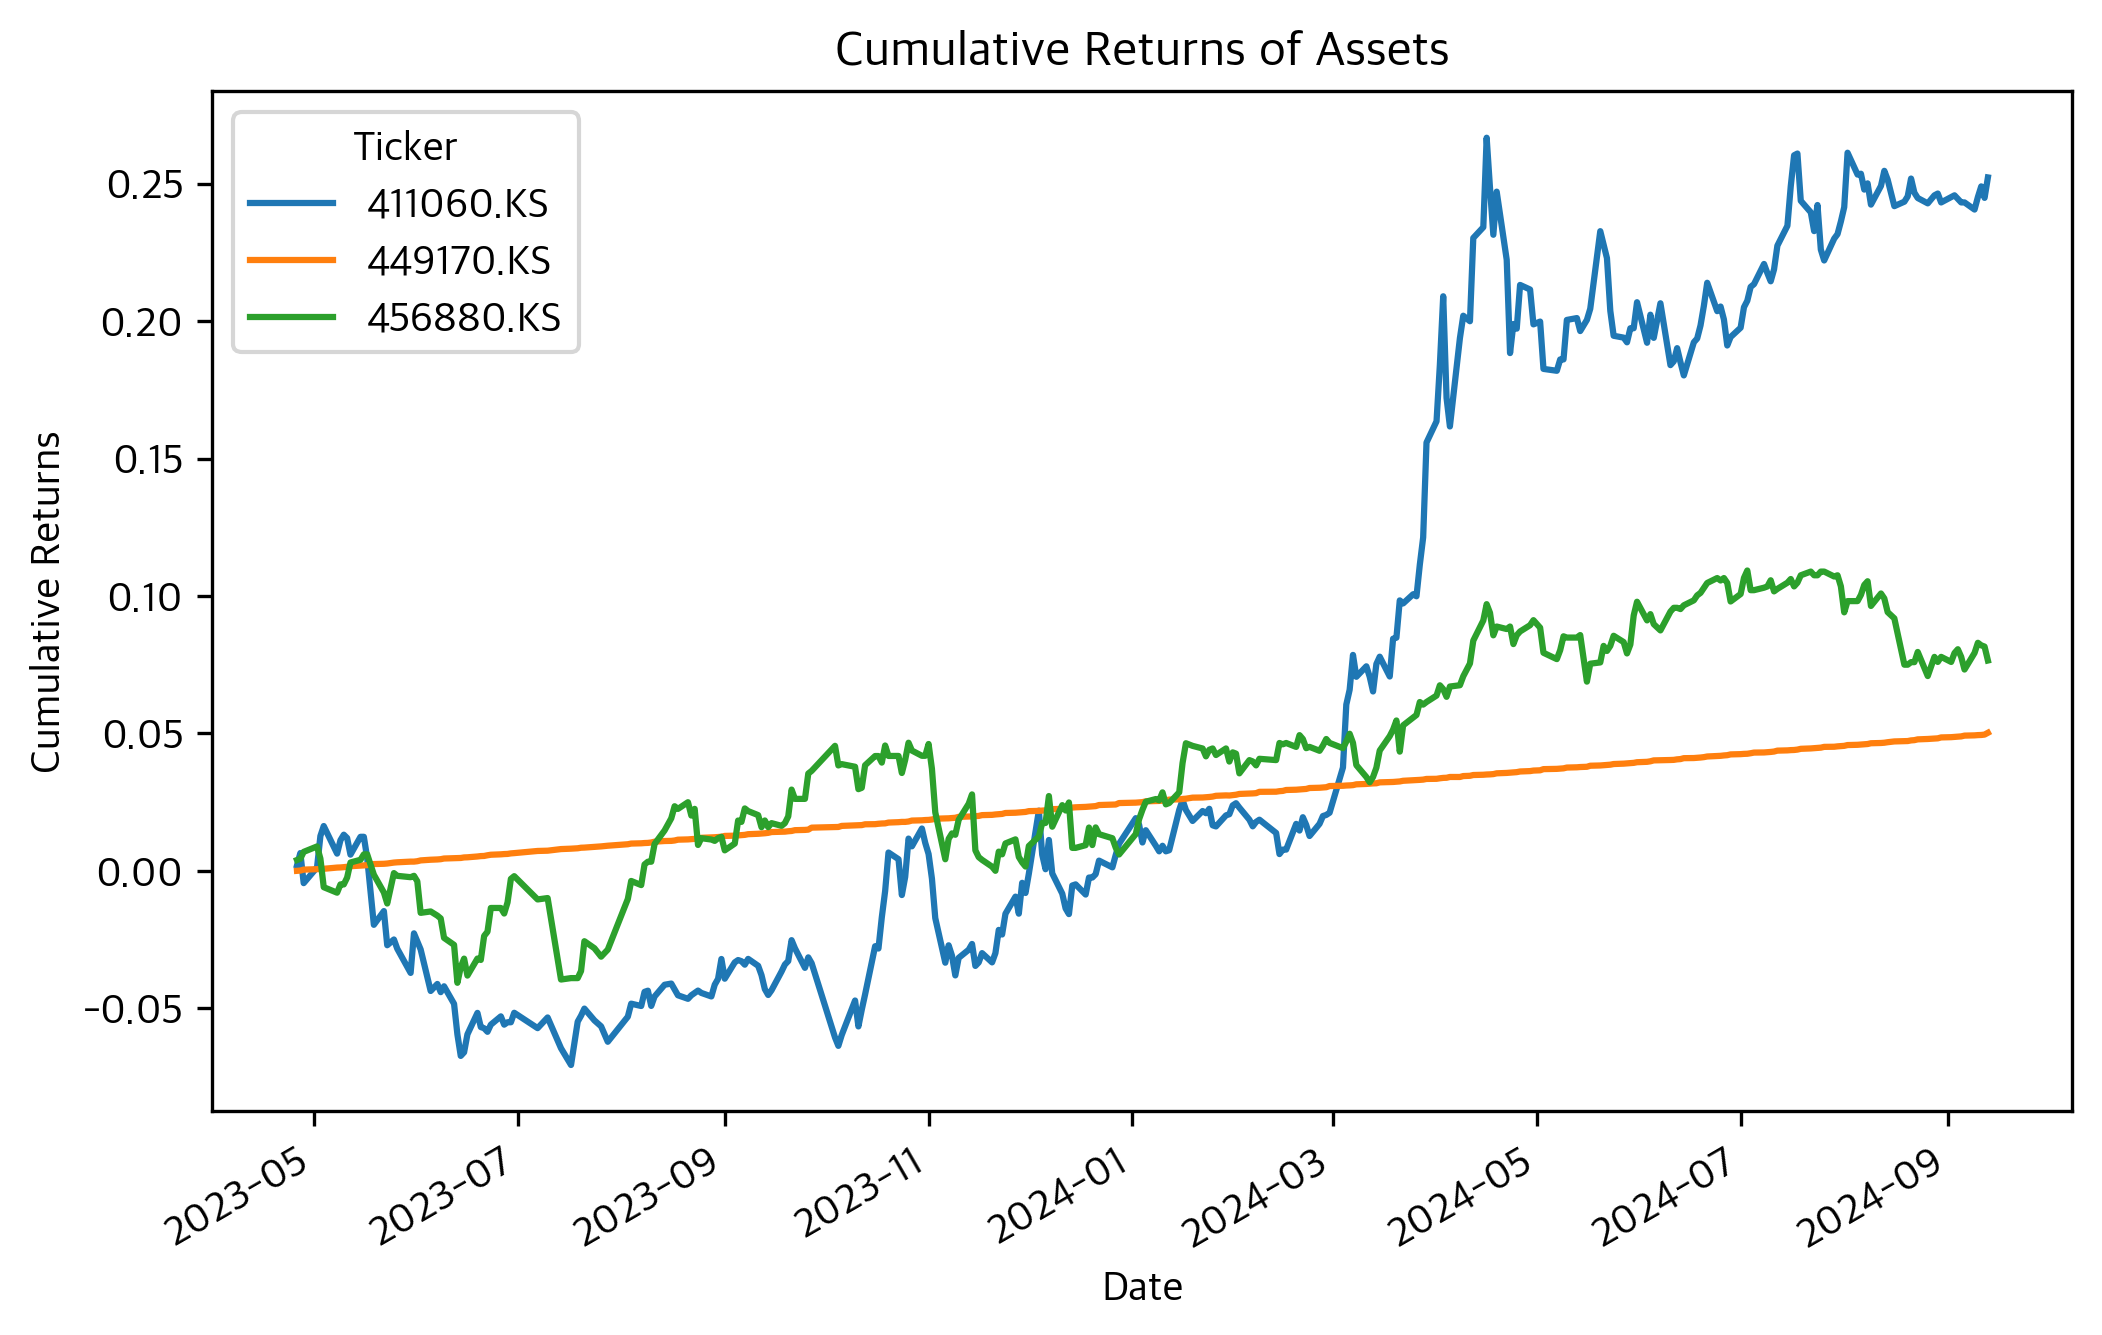

In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.4%}'.format

# 1. yfinance에서 실제 데이터를 가져옵니다.
tickers = [
    '449170.KS',  # 원화 
    '411060.KS',  # 금
    '456880.KS',  # 달러
]

asset_classes = {
    'Assets': ['449170.KS', '411060.KS', '456880.KS'],
    'Class': ['KRW', 'GOLD', 'USD']  
}

# DataFrame으로 변환
asset_classes = pd.DataFrame(asset_classes)
display(asset_classes)

# 2. 주식 데이터 다운로드 (2000년 1월 1일부터 2025년 1월 1일까지의 데이터를 사용)
data = yf.download(tickers, start='2000-01-01', end='2025-01-01')['Adj Close']

# 3. 수익률 데이터 생성
returns = data.pct_change().dropna()
display(returns)

# 4. 각 자산의 평균 수익률 및 분산 계산 (연간 기준)
annual_mean_returns = returns.mean() * 252
annual_variance_returns = returns.var() * 252

print("각 자산의 연간 평균 수익률:")
display(annual_mean_returns)

print("각 자산의 연간 분산:")
display(annual_variance_returns)

# 5. 누적 수익률 그래프
cumulative_returns = returns.cumsum()
cumulative_returns.plot()
plt.title('Cumulative Returns of Assets')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()


In [7]:
import numpy as np
import pandas as pd
import yfinance as yf
import riskfolio as r
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format
yf.pdr_override()

# Date range
start = '2000-01-01'
end = '2024-12-30'

# Tickers of assets
tickers = [
    'SPY',  # 미국 주식
    'SHY',  # 미국 단기채
    'GLD',  # 금
]
exrate = ['USDKRW=X']
downloads = tickers + exrate
downloads.sort()

# Downloading the data
data = yf.download(downloads, start=start, end=end)

# Adjust Close 데이터 추출
data_adj_close = data.loc[:, ('Adj Close', slice(None))]
data_adj_close.columns = data_adj_close.columns.droplevel(0)

# 환율 데이터 추출
exrate_data = data_adj_close['USDKRW=X']

# 자산 가격 데이터를 원화로 변환
assets_krw = data_adj_close[tickers].multiply(exrate_data, axis=0)

# 일일 수익률 계산
returns = assets_krw.pct_change().dropna()

[*********************100%%**********************]  4 of 4 completed


In [5]:
import numpy as np
import pandas as pd
import yfinance as yf
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=returns)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Estimate optimal portfolio:

port.alpha = 0.05 # alpha는 VaR(Value at Risk)과 같은 측정에서 사용하는 신뢰 수준을 설정합니다. 여기서는 5%를 설정했습니다. 이는 95% 신뢰 수준을 의미합니다.
model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,411060.KS,449170.KS,456880.KS
weights,0.1447%,99.6282%,0.2270%


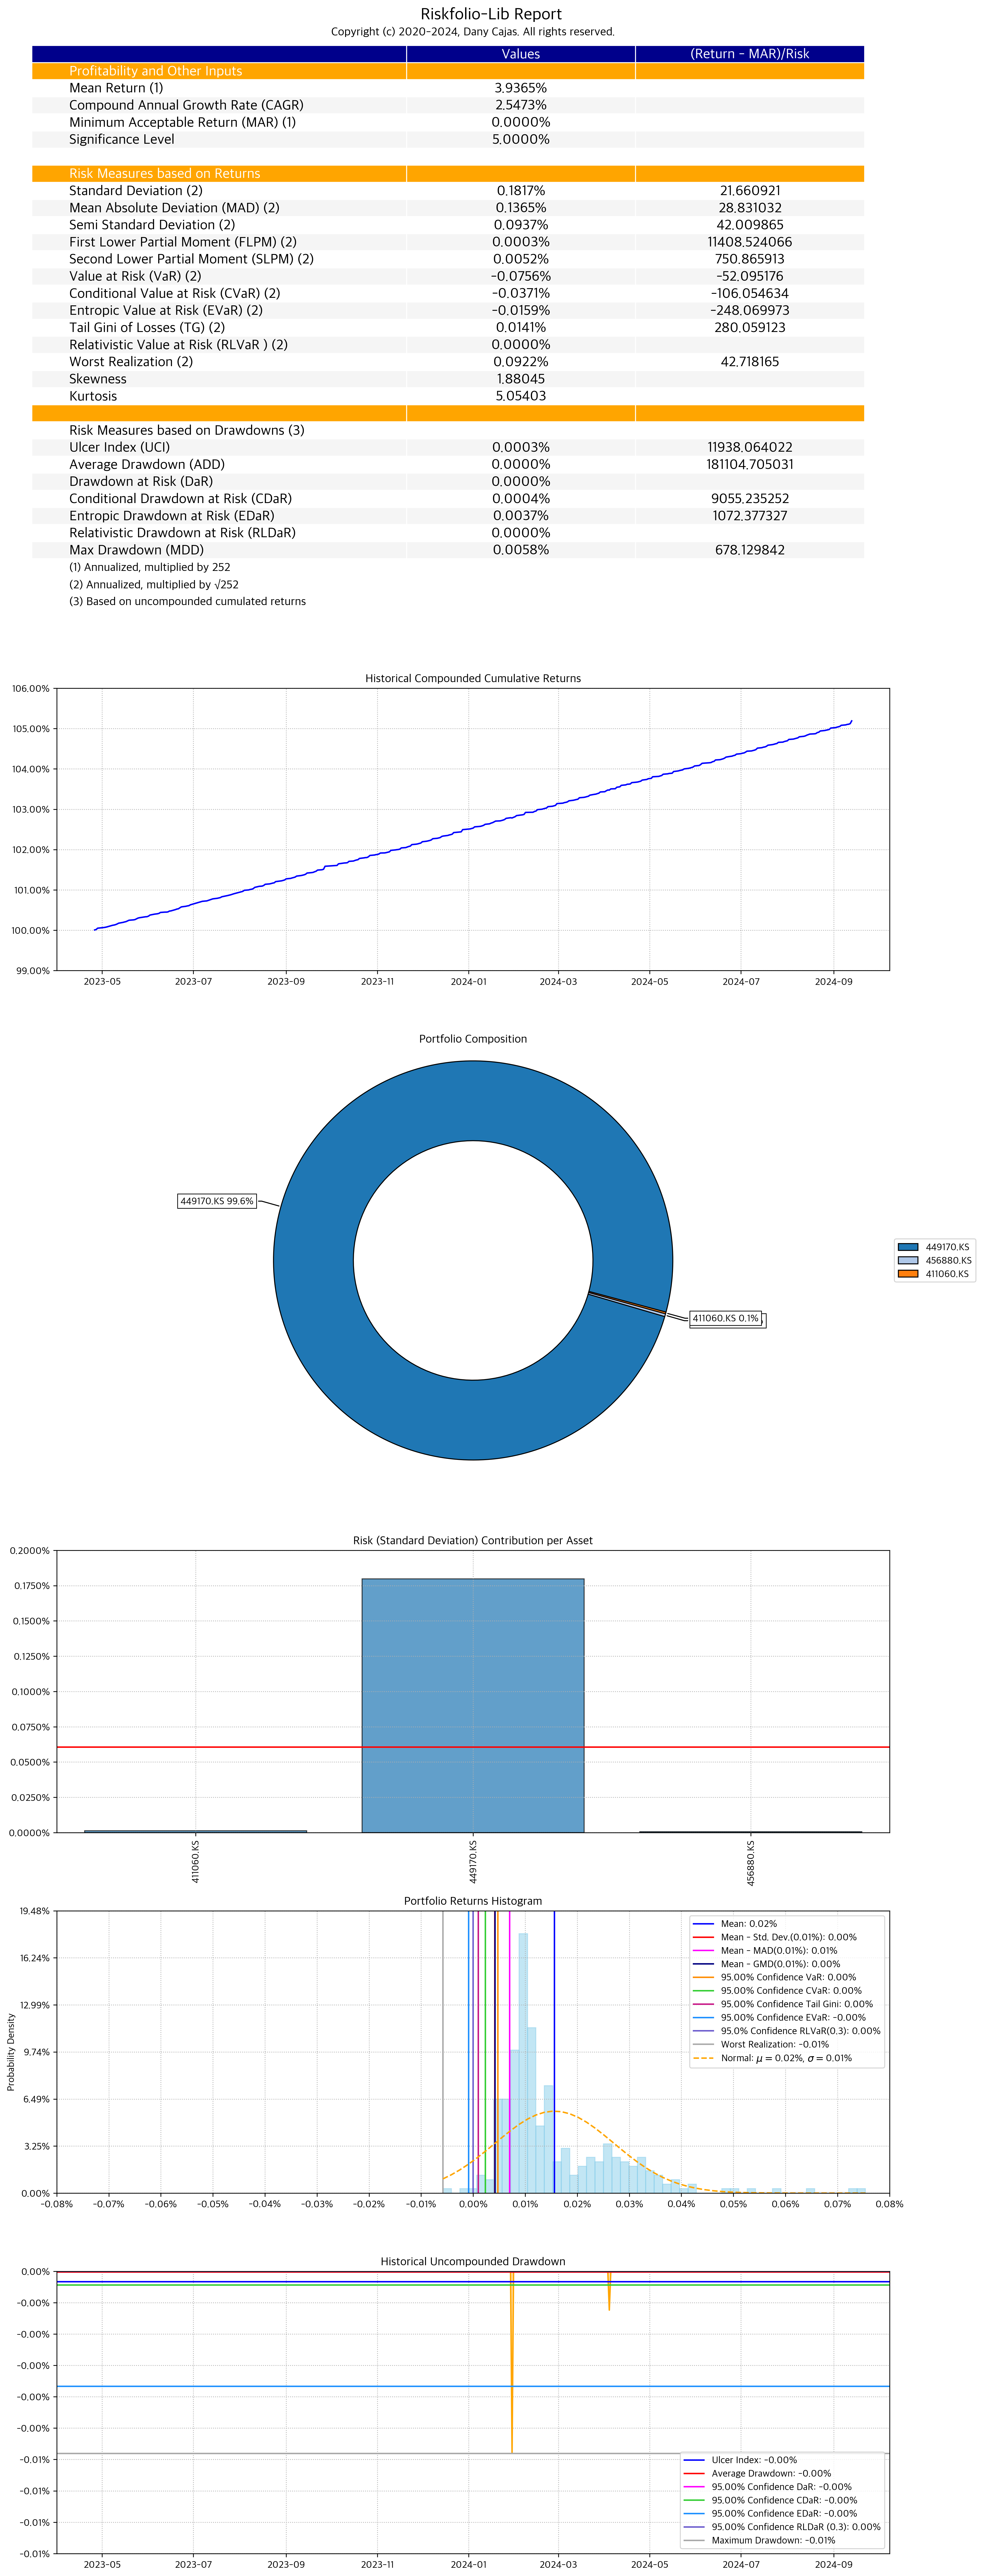

In [6]:
ax = rp.jupyter_report(returns=returns,
                            w=w,
                            rm=rm,
                            rf=0,
                            alpha=0.05,
                            height=6,
                            width=14,
                            others=0.05,
                            solver='MOSEK',
                            nrow=25)